# STAT 542 - Statistical Learning

# Homework 7 - Manan Mehta (mananm2)

## Due: 10/12/2020

## About HW7

Kernel regression involves two decisions: choosing the kernel and tuning the bandwidth. Usually, tuning the bandwidth is more influential than choosing the kernel function. Tuning the bandwidth is similar to tuning $k$ in a KNN model. However, this is more difficult in multi-dimensional models. We practice one and two-dimensional kernels which involve these elements.

In [1]:
#Import all the necessary packages
import numpy as np
import math
import pandas as pd
from sklearn.metrics import mean_squared_error as MSE

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

## Question 1 (65 Points) One-dimensional Kernel Regression

For this question, you should only use the base package and write all the main kernel regression mechanism by yourself. We will use the same ozone data in HW6. Again, for Question 1, we only use `time` as the covariate, while in Question 2, we use both `time` and `wind`.

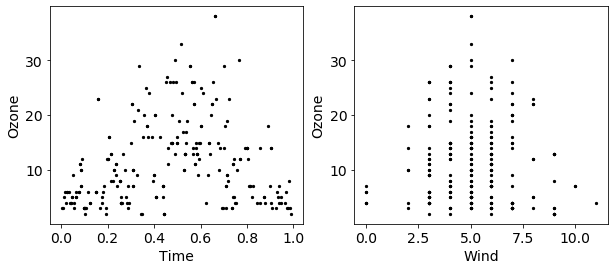

In [2]:
#We could not find the Ozone dataset (the same as the mlbench R package) online.
#Hence we took the following code from R and converted "mydata" to "mydata.csv" to use in Python
'''
library(mlbench)
data(Ozone)
mydata = data.frame("time" = seq(1:nrow(Ozone))/nrow(Ozone), "ozone" = Ozone$V4, "wind" = Ozone$V6)

write.csv(mydata, "mydata.csv")

'''
mydata = pd.read_csv("mydata.csv").dropna()
np.random.seed(5)
trainid = np.random.randint(0, len(mydata), 250)
traindf, testdf = mydata.iloc[trainid] , mydata[~mydata.index.isin(trainid)]

traindf = traindf.sort_values('time')

fig, axarr = plt.subplots(1,2,figsize = (10,4))
ax1, ax2 = axarr[0], axarr[1]
ax1.scatter(traindf['time'], traindf['ozone'], s = 5, color = 'black')
ax1.set_xlabel('Time')
ax1.set_ylabel('Ozone')
ax2.scatter(traindf['wind'], traindf['ozone'], s = 5, color = 'black')
ax2.set_xlabel('Wind')
ax2.set_ylabel('Ozone')
plt.show()

Consider two kernel functions: 

  * Gaussian kernel, defined as $K(u) = \frac{1}{\sqrt{2 \pi}} e^{- \frac{u^2}{2}}$

  * Epanechnikov kernel, defined as $K(u) = \frac{3}{4}(1-u^2)$ for $|u| \leq 1$. 
  
For both kernel functions, incorporate a bandwidth $h$. You should start with the Silverman's rule-of-thumb for the choice of $h$, and then tune $h$. You need to perform the following:

  * Using the Silverman's rule-of-thumb, fit and plot the regression line with both kernel functions, and plot them together in a single figure. Report the testing MSE of both methods.
  
  * Base on our theoretical understanding of the bias-variance trade-off, select two $h$ values for the Gaussian kernel: a value with over-smoothing (small variance and large bias); a value with under-smoothing (large variance and small bias), and plot the two curves, along with the Gaussian rule-of-thumb curve, in a single figure. Clearly indicate which curve is over/under-smoothing.
  
  * For the Epanechnikov kernel, tune the $h$ value (on a grid of 10 different $h$ values) by minimizing the testing data. Plot your optimal regression line.

In [3]:
#Write the kernel functions
def gaussianKernel(x1, x2, h = 1.0):
    '''
    1D Gaussian kernel. Computes 
    a kernel matrix from points in x1 and x2.
        
    Args:
        x1: Array of m points (m x 1)
        x2: Array of n points (n x 1)

    Returns:
        Kernel matrix (m x n).
    '''
    x1, x2 = x1.reshape(-1,1) , x2.reshape(-1,1)
    
    sqdist = (np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)) / h**2
    
    ker = np.exp(-0.5 * sqdist)
    
    return (1/(h * np.sqrt(2*math.pi))) * ker


def epcKernel(x1, x2, h = 1.0):
    '''
    Gaussian kernel. Computes 
    a kernel matrix from points in x1 and x2.
        
    Args:
        x1: Array of m points (m x 1)
        x2: Array of n points (n x 1)

    Returns:
        Kernel matrix (m x n).
    '''
    x1, x2 = x1.reshape(-1,1) , x2.reshape(-1,1)
    
    sqdist = (np.sum(x1**2, 1).reshape(-1,1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)) / h**2
    
    #Set all distances > 1 = 1
    sqdist[ sqdist > 1 ] = 1
    
    return 0.75*(1 - sqdist) / h


#Kernel Regression Function

def kernelRegresion(xtrain, ytrain, xtest, bandwidth = None, kernel = 'Gaussian'):
    '''
    Function to fit a kernel regression in 1D
    
    Inputs:
    - xtrain    : Training Points (n x 1)
    - ytrain    : Training Outputs (n x 1)
    - xtest     : Testing Points (m x 1)
    - bandwidth : Parameter for the kernel
                  Defaults to the Silverman's Estimation if not provided
                  
    - kernel    : Name of the Kernel to be used. Accepts:
                  'Gaussian' : Gaussian Kernel
                  'Epc'      : Epanechnikov Kernel
                  
    Outputs:
    - ytest : Fitted regression on to xtest (m x 1)    
    
    '''
    n = xtrain.shape[0]
    
    if bandwidth == None:
        h = 1.06 * np.std(xtrain) * n**(-0.2)
    else:
        h = bandwidth
    
    if kernel == 'Gaussian':
        kernelMatrix = gaussianKernel(xtest, xtrain, h)
    elif kernel == 'Epc':
        kernelMatrix = epcKernel(xtest, xtrain, h)
    else:
        print("Check Kernel Name!")
        return 0
    
    ytest = kernelMatrix.dot(ytrain) / np.sum(kernelMatrix, axis = 1)
    
    return ytest

Using the Silverman's rule-of-thumb, fit and plot the regression line with both kernel functions, and plot them together in a single figure. Report the testing MSE of both methods.

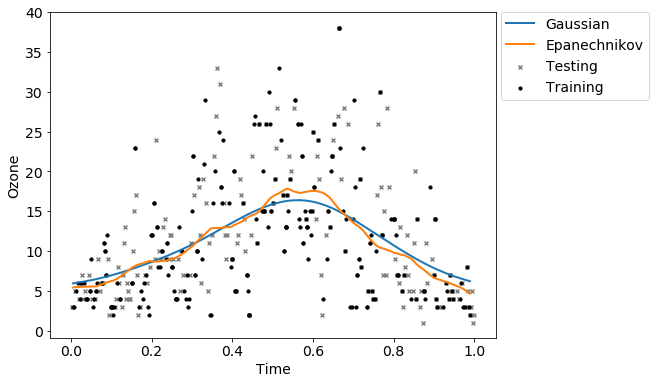

In [4]:
xtrain, ytrain = np.array(traindf['time']) , np.array(traindf['ozone'])
xtest, ytest = np.array(testdf['time']) , np.array(testdf['ozone'])

y_gaussian_train = kernelRegresion(xtrain, ytrain, xtrain, kernel = 'Gaussian')
y_epc_train = kernelRegresion(xtrain, ytrain, xtrain, kernel = 'Epc')

y_gaussian_predicted = kernelRegresion(xtrain, ytrain, xtest, kernel = 'Gaussian')
y_epc_predicted = kernelRegresion(xtrain, ytrain, xtest, kernel = 'Epc')

plt.figure(figsize = (8,6))
plt.scatter(xtest, ytest, s = 15, color = 'gray', marker = 'x', label = 'Testing')
plt.scatter(xtrain, ytrain, s = 10, color = 'black', marker = 'o', label = 'Training')
plt.plot(xtrain, y_gaussian_train, label = 'Gaussian', lw = 2)
plt.plot(xtrain, y_epc_train, label = 'Epanechnikov', lw = 2)

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Time')
plt.ylabel('Ozone')
plt.show()

In [5]:
print("Testing MSE for Gaussian: {:.2f}".format(MSE(y_gaussian_predicted, ytest)))
print("Testing MSE for Epanechnikov: {:.2f}".format(MSE(y_epc_predicted, ytest)))

Testing MSE for Gaussian: 38.13
Testing MSE for Epanechnikov: 36.91


Base on our theoretical understanding of the bias-variance trade-off, select two $h$ values for the Gaussian kernel: a value with over-smoothing (small variance and large bias); a value with under-smoothing (large variance and small bias), and plot the two curves, along with the Gaussian rule-of-thumb curve, in a single figure. Clearly indicate which curve is over/under-smoothing.

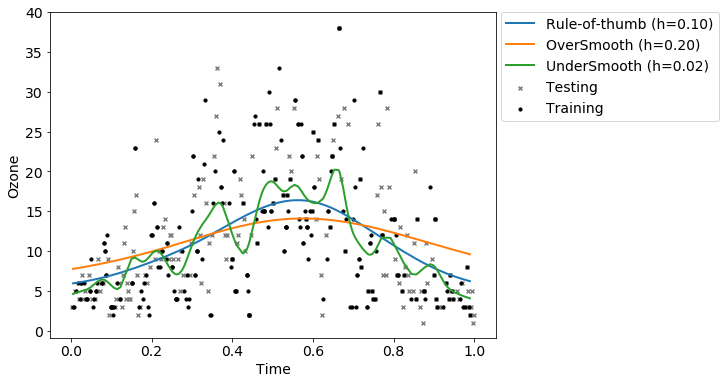

In [6]:
#We know that as h increases, the bias increases and variance decreases.
#h obtained from Silverman ~ 0.095
h_silverman = 1.06 * np.std(xtrain) * xtrain.shape[0]**(-0.2)
h_over_smooth = 0.2
h_under_smooth = 0.02

y_over_smooth = kernelRegresion(xtrain, ytrain, xtrain, h_over_smooth, kernel = 'Gaussian')
y_under_smooth = kernelRegresion(xtrain, ytrain, xtrain, h_under_smooth, kernel = 'Gaussian')

plt.figure(figsize = (8,6))
plt.scatter(xtest, ytest, s = 15, color = 'gray', marker = 'x', label = 'Testing')
plt.scatter(xtrain, ytrain, s = 10, color = 'black', marker = 'o', label = 'Training')
plt.plot(xtrain, y_gaussian_train, label = 'Rule-of-thumb (h={:.2f})'.format(h_silverman), lw = 2)
plt.plot(xtrain, y_over_smooth, label = 'OverSmooth (h={:.2f})'.format(h_over_smooth), lw = 2)
plt.plot(xtrain, y_under_smooth, label = 'UnderSmooth (h={:.2f})'.format(h_under_smooth), lw = 2)

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Time')
plt.ylabel('Ozone')
plt.show()

For the Epanechnikov kernel, tune the $h$ value (on a grid of 10 different $h$ values) by minimizing the testing data MSE. Plot your optimal regression line.

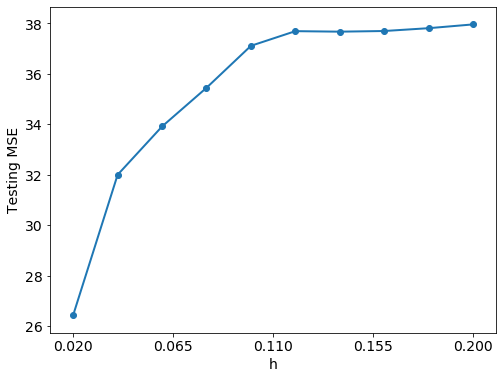

In [13]:
#Choose the grid such that h_silverman is at the (approx.) center 
h_grid = np.linspace(0.02, 0.20, 10)
testingMSE = []
for h in h_grid:
    y_epc_predicted = kernelRegresion(xtrain, ytrain, xtest, h, kernel = 'Epc')
    testingMSE.append(MSE(y_epc_predicted, ytest))

plt.figure(figsize = (8,6))
plt.plot(h_grid, testingMSE, lw = 2)
plt.scatter(h_grid, testingMSE)
plt.xticks(np.linspace(0.02, 0.20, 5))
plt.xlabel('h')
plt.ylabel('Testing MSE')
plt.show()

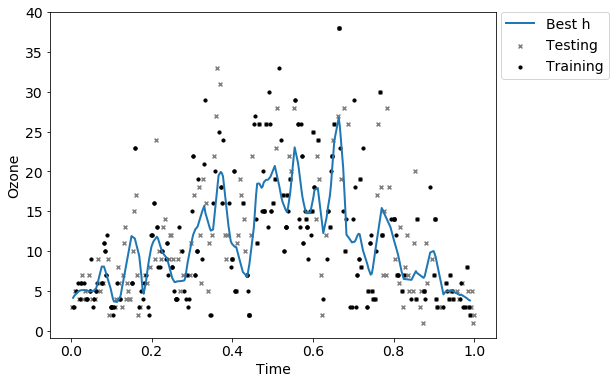

In [14]:
y_best_h = kernelRegresion(xtrain, ytrain, xtrain, 0.02, kernel = 'Epc')

plt.figure(figsize = (8,6))
plt.scatter(xtest, ytest, s = 15, color = 'gray', marker = 'x', label = 'Testing')
plt.scatter(xtrain, ytrain, s = 10, color = 'black', marker = 'o', label = 'Training')
plt.plot(xtrain, y_best_h, label = 'Best h', lw = 2)

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Time')
plt.ylabel('Ozone')
plt.show()

## Question 2 (35 Points) Multi-dimensional Kernel

We consider using both `time` and `wind` in the regression. We use the following multivariate kernel function, which is essentially a Gaussian kernel with diagonal covariance matrix.

$$ K_{\boldsymbol \lambda}(x_i, x_j) = e^{-\frac{1}{2} \sum_{k=1}^p \left((x_{ik} - x_{jk})/\lambda_k\right)^2}$$

Based on Silverman's formula, the bandwidth for the $k$th variable is given by

$$\lambda_k = \left(\frac{4}{p+2}\right)^{\frac{1}{p+4}} n^{-\frac{1}{p+4}} \, \, \widehat \sigma_k,$$

where $\widehat\sigma_k$ is the estimated standard deviation for variable $k$, $p$ is the number of variables, and $n$ is the sample size. Use the Nadaraya-Watson kernel estimator to fit and predict the `ozone` level. 

  * Calculate the prediction error and compare this to the univariate model in Question 1. 
  * Provide a discussion (you do not need to implement them) on how this current two-dimensional kernel regression can be improved. Provide at least two ideas that could potentially improve the performance.

In [15]:
#Changes made to the above functions to accommodate for 2D covariates
def gaussianKernel2D(X1, X2, h):
    '''
    2D Gaussian kernel. Computes 
    a kernel matrix from points in x1 and x2.
        
    Args:
        x1: Array of m points (n x 2)
        x2: Array of n points (m x 2)

    Returns:
        Kernel matrix (n x m)
    '''
    
    x1, y1 = X1[:,0].reshape(-1,1) , X1[:,1].reshape(-1,1)
    x2, y2 = X2[:,0].reshape(-1,1) , X2[:,1].reshape(-1,1)
    
    x_dist = np.matrix((x1.T - x2)**2) / h[0]**2
    y_dist = np.matrix((y1.T - y2)**2) / h[1]**2
    
    return np.asarray(np.exp(-0.5 * (x_dist + y_dist)))


def kernelRegresion2D(xtrain, ytrain, xtest, bandwidth = None):
    '''
    Function to fit a kernel regression in 2D using Gaussian Kernel
    
    Inputs:
    - xtrain    : Training Points (n x 2)
    - ytrain    : Training Outputs (n x 1)
    - xtest     : Testing Points (m x 2)
    - bandwidth : Parameter list for the kernel (2 x 1)
                  Defaults to the Silverman's Estimation if not provided

                  
    Outputs:
    - ytest : Fitted regression on to xtest (m x 1)    
    
    '''
    n = xtrain.shape[0]
    p = xtrain.shape[1]
    
    if bandwidth == None:
        h = (4/(p+2))**(1/(p+4)) * n**(-1/(p+4)) * np.std(xtrain, 0)
    else:
        h = bandwidth
    
    kernelMatrix = gaussianKernel2D(xtrain, xtest, h)
    
    ytest = kernelMatrix.dot(ytrain) / np.sum(kernelMatrix, axis = 1)
    
    return ytest

In [16]:
xtrain, ytrain = traindf.loc[:, ['time', 'wind']].values , np.array(traindf['ozone'])
xtest, ytest = testdf.loc[:, ['time', 'wind']].values , np.array(testdf['ozone'])
ypredicted = kernelRegresion2D(xtrain, ytrain, xtest, bandwidth = None)
print("Testing MSE for 2D Gaussian: {:.2f}".format(MSE(ypredicted, ytest)))

Testing MSE for 2D Gaussian: 35.08


Testing MSE for 2D model is 35.08 which is lesser than the univariate model testing MSE of 38.13.

#### Possible ways to improve the 2-D kernel regression:

1. We can perform Cross Validation to tune each $\lambda_k$ instead of using the default $\lambda_k$s based on Silverman's formula. An optimal set of $\lambda_k$s will decrease testing MSE.

2. We know that the kernel averaging is biased on the boundaries due to asymmetry of the kernel in near the boundaries. Thus, we can correct the boundary bias of the kernel estimator by using local linear or polynomial regression. For example, we can implement local linear regression by minimizing the objective function:

$$ \min_{\beta_0{(x)}, \beta_1{(x)}} \sum_{i=1}^n { K_\lambda (x, x_i) [y_i - \beta_0{(x)} - \beta_1{(x)}x_i]^2 } $$